# Exploratory Data Analysis

**Goal**: uncover actionable insight for preprocessing, feature engineering and model selection steps. Collect inspiration for those steps. 

#### 1. Independent and Dependent Variable Distributions
- are x and y values normally distributed, does this matter?

#### 2. Null Values

**3. Next**: [data preprocessing notebook](http://localhost:8888/notebooks/Git_Projects/housing-prediction/2_data_cleaning_preprocessing.ipynb)

In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
import seaborn as sns
pd.set_option("display.max_columns", None)


import warnings
warnings.filterwarnings('ignore')

In [2]:
#pulls data from GCP storage and saves in local
#%run -i 'data_pull.py'

In [24]:
#import the raw data here
df = pd.read_csv('./data/raw/Ames_HousePrice.csv').iloc[:, 1:]

#added after creating preprocess notebook
df_housing = pd.read_csv('./data/clean/cleaned.csv')

#adding in log of SalePrice
df_housing['log_SalePrice']= np.log(df_housing['SalePrice'])

In [25]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2624 entries, 0 to 2623
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PID            2624 non-null   int64  
 1   GrLivArea      2624 non-null   int64  
 2   SalePrice      2624 non-null   int64  
 3   MSSubClass     2624 non-null   int64  
 4   MSZoning       2624 non-null   object 
 5   LotFrontage    2624 non-null   float64
 6   LotArea        2624 non-null   int64  
 7   Street         2624 non-null   object 
 8   Alley          2624 non-null   object 
 9   LotShape       2624 non-null   object 
 10  LandContour    2624 non-null   object 
 11  Utilities      2624 non-null   object 
 12  LotConfig      2624 non-null   object 
 13  LandSlope      2624 non-null   object 
 14  Neighborhood   2624 non-null   object 
 15  Condition1     2624 non-null   object 
 16  Condition2     2624 non-null   object 
 17  BldgType       2624 non-null   object 
 18  HouseSty

In [26]:
df_housing.isnull().sum().sort_values(ascending = False)

long             1
lat              1
PID              0
HalfBath         0
FireplaceQu      0
                ..
Exterior2nd      0
Exterior1st      0
RoofMatl         0
RoofStyle        0
log_SalePrice    0
Length: 82, dtype: int64

In [27]:
#correlation to Y
df_housing.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False).head(15)

,SalePrice
SalePrice,1.000000
log_SalePrice,0.949159
OverallQual,0.791702
GrLivArea,0.721227
TotalBsmtSF,0.659358
1stFlrSF,0.647255
GarageCars,0.638052
GarageArea,0.631373
YearBuilt,0.542728
FullBath,0.533422


# Functions

In [46]:
def boxplot_sorted(df, by, column, group, rot=0):
    # use dict comprehension to create new dataframe from the iterable groupby object
    # each group name becomes a column in the new dataframe
    df2 = pd.DataFrame({col:vals[column] for col, vals in df.groupby(by)})
    # find and sort the median values in this new dataframe
    meds = df2.median().sort_values()
    # use the columns in the dataframe, ordered sorted by median value
    # return axes so changes can be made outside the function
    return sns.boxplot(x=by, y=column, data=df, hue=group, order= meds.index)

In [68]:
def displot(col):
    sns.displot(df_housing[col])

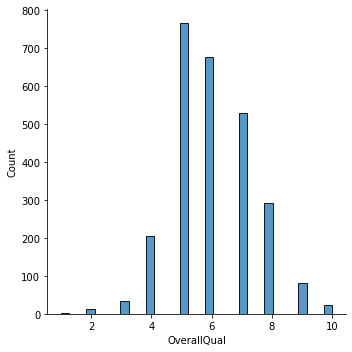

In [70]:
displot('OverallQual')

### Distribution of dependent variable

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

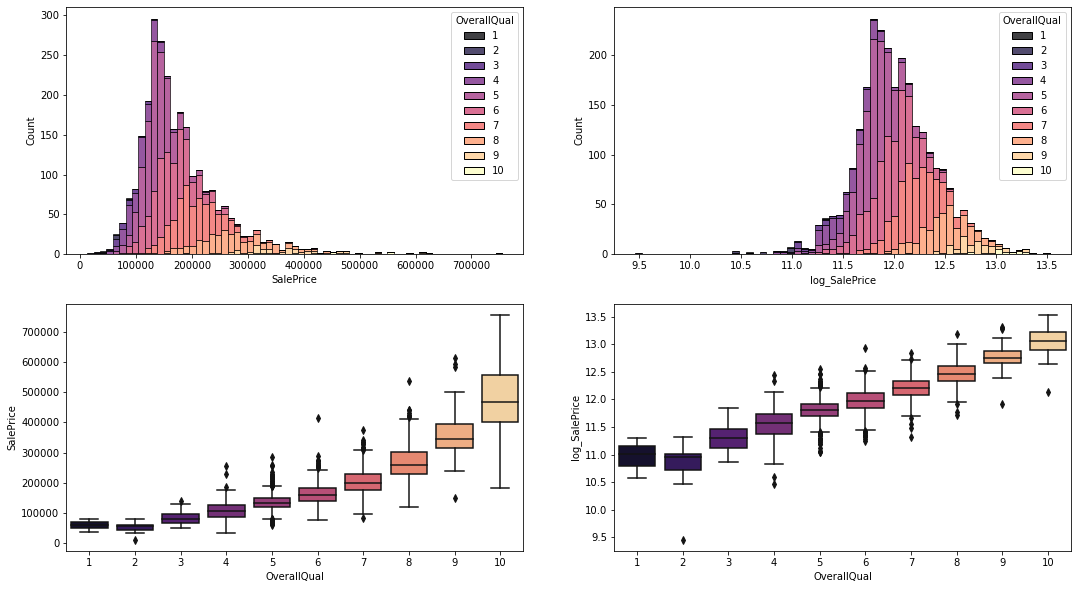

In [28]:
#Distribution of Sale Price and Log Sale Price with some added color 

fig, ax = plt.subplots(2, 2, figsize = (18, 10))
sns.boxplot(x='OverallQual', y='SalePrice', data=df_housing, palette = "magma", ax = ax[1,0])
sns.boxplot(x='OverallQual', y='log_SalePrice', data=df_housing,palette = "magma", ax = ax[1,1])
sns.histplot(df_housing,x='log_SalePrice', stat='count', hue='OverallQual',palette = "magma", multiple='stack', ax = ax[0,1])
sns.histplot(df_housing,x='SalePrice', stat='count', hue='OverallQual', palette = "magma", multiple='stack', ax = ax[0,0])

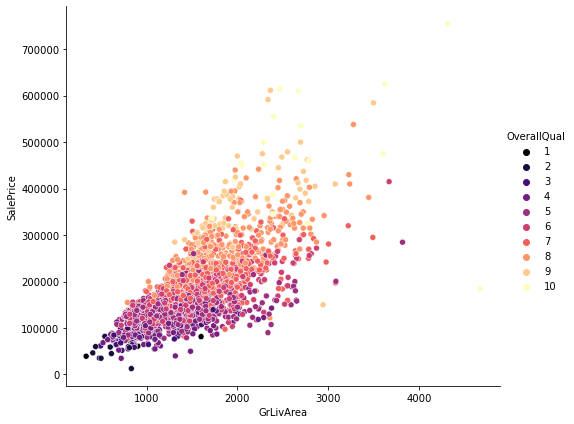

In [29]:
sns.relplot(data=df_housing, x='GrLivArea', y='SalePrice', kind='scatter',
            height=6, aspect=1.2, hue='OverallQual', palette='magma', legend = 'full')

In [30]:
display(df_housing.describe().round(2))

,PID,GrLivArea,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,lat,long,log_SalePrice
count,2.624000e+03,2624.00,2624.00,2624.00,2624.00,2624.00,2624.00,2624.00,2624.00,2624.00,2624.00,2624.00,2624.00,2624.00,2624.00,2624.00,2624.00,2624.00,2624.00,2624.00,2624.00,2624.00,2624.00,2624.00,2624.00,2624.00,2624.00,2624.00,2624.00,2624.00,2624.00,2624.00,2624.00,2624.00,2624.00,2624.00,2624.00,2623.00,2623.00,2624.00
mean,7.150624e+08,1482.80,177875.01,57.87,68.23,10089.20,6.04,5.62,1970.32,1983.70,98.77,443.89,53.13,538.50,1035.52,1143.21,335.32,4.26,0.44,0.06,1.55,0.38,2.85,1.04,6.38,0.60,1878.27,1.74,465.89,95.89,45.83,23.04,2.47,16.34,48.07,6.15,2007.84,42.03,-93.64,12.01
std,1.886760e+08,488.84,75776.36,43.09,21.02,8079.42,1.37,1.12,29.68,20.49,176.09,429.32,173.73,424.76,422.13,377.29,422.84,44.26,0.52,0.24,0.55,0.50,0.82,0.20,1.54,0.65,431.31,0.74,207.11,128.87,65.80,63.80,25.08,56.79,494.61,2.67,1.31,0.02,0.03,0.39
min,5.263011e+08,334.00,12789.00,20.00,21.00,1300.00,1.00,1.00,1872.00,1950.00,0.00,0.00,0.00,0.00,0.00,334.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00,41.99,-93.69,9.46
25%,5.313630e+08,1107.00,129887.50,20.00,59.00,7386.00,5.00,5.00,1953.00,1965.00,0.00,0.00,0.00,213.75,788.00,868.00,0.00,0.00,0.00,0.00,1.00,0.00,2.00,1.00,5.00,0.00,1957.00,1.00,315.75,0.00,0.00,0.00,0.00,0.00,0.00,4.00,2007.00,42.02,-93.66,11.77
50%,5.354551e+08,1432.00,159000.00,50.00,66.63,9368.50,6.00,5.00,1972.00,1992.00,0.00,384.00,0.00,448.00,976.00,1068.00,0.00,0.00,0.00,0.00,2.00,0.00,3.00,1.00,6.00,1.00,1977.00,2.00,474.00,0.00,25.00,0.00,0.00,0.00,0.00,6.00,2008.00,42.03,-93.64,11.98
75%,9.071811e+08,1728.00,208925.00,70.00,80.00,11475.75,7.00,6.00,1999.00,2003.00,156.00,732.00,0.00,784.00,1262.50,1362.25,702.00,0.00,1.00,0.00,2.00,1.00,3.00,1.00,7.00,1.00,1999.00,2.00,576.00,168.00,68.00,0.00,0.00,0.00,0.00,8.00,2009.00,42.05,-93.62,12.25
max,1.007100e+09,4676.00,755000.00,190.00,313.00,215245.00,10.00,9.00,2010.00,2010.00,1600.00,2288.00,1526.00,2336.00,3206.00,3820.00,1872.00,1064.00,3.00,2.00,4.00,2.00,6.00,3.00,13.00,4.00,2010.00,5.00,1488.00,1424.00,742.00,1012.00,508.00,576.00,15500.00,12.00,2010.00,42.06,-93.58,13.53


In [31]:
print("Skewness: %f" %df_housing['SalePrice'].skew()) #feature skewness measures lack of symmetry
print("Kurtosis: %f" %df_housing['SalePrice'].kurt()) #kurtosis measures if data is heavy or long tailed

Skewness: 1.814685
Kurtosis: 5.653153


## Skew among independent Variables

In [52]:
##Identify variables with high skew levels
skewed = df_housing.select_dtypes(exclude=['object']).skew(axis=0).sort_values(ascending=False)

high_skew = skewed[abs(skewed) > 0.5]
high_skew.head()

MiscVal         21.462700
LowQualFinSF    13.216536
LotArea         13.091177
3SsnPorch       11.932665
KitchenAbvGr     4.575091
dtype: float64

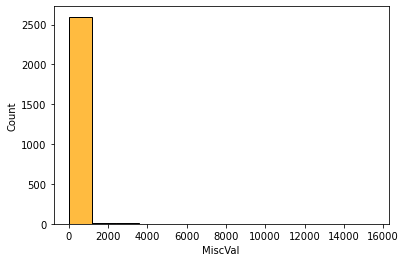

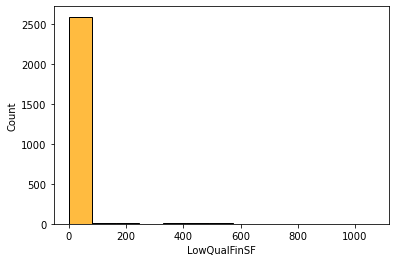

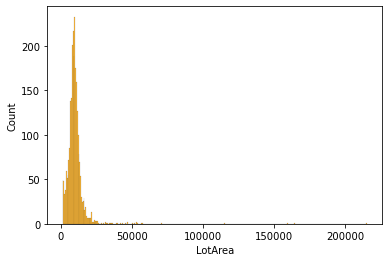

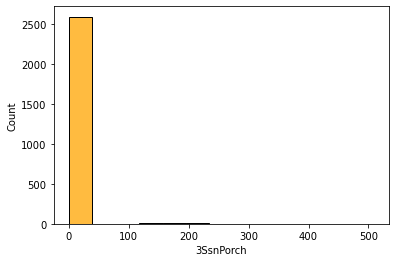

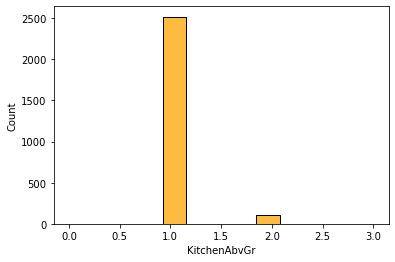

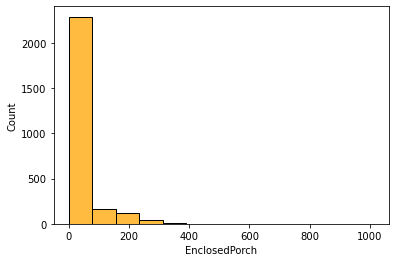

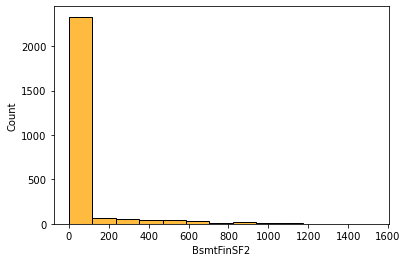

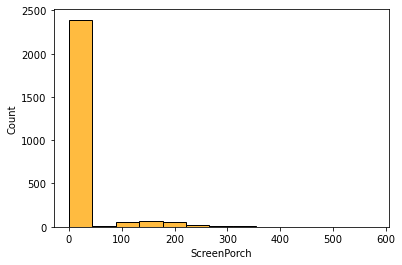

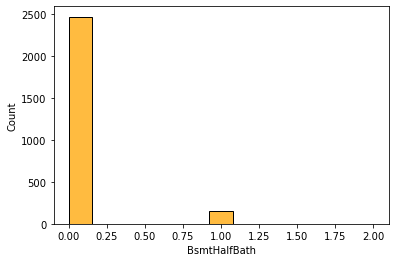

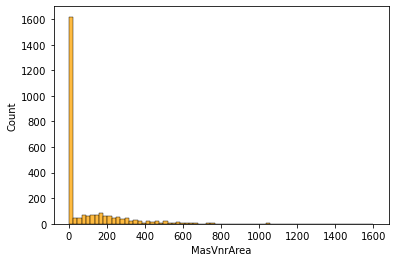

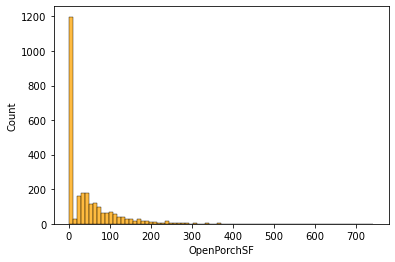

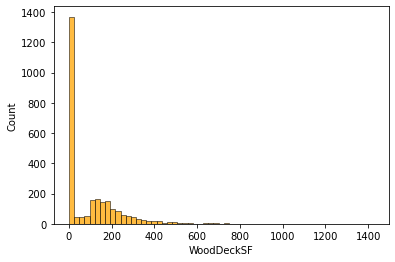

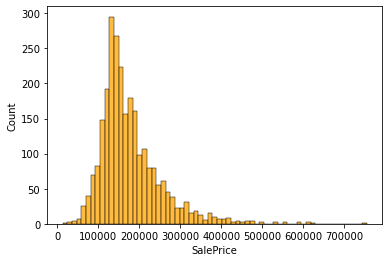

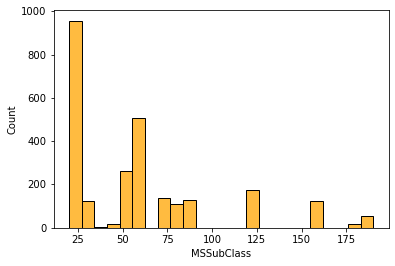

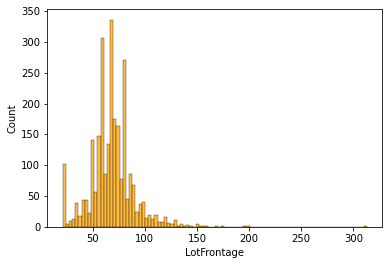

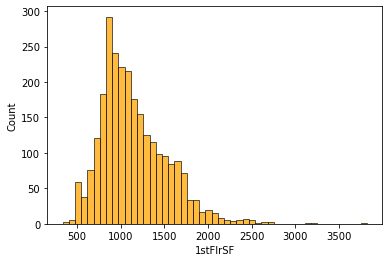

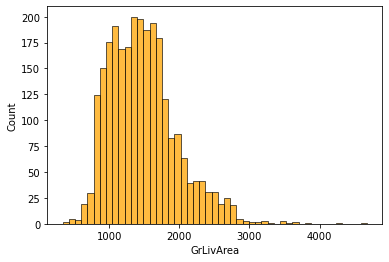

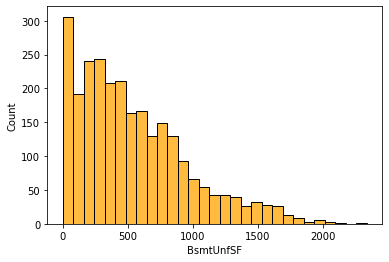

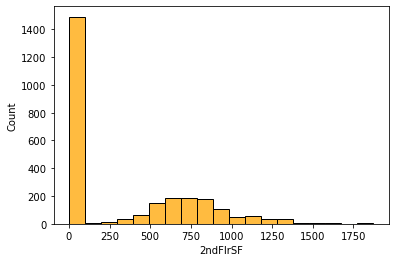

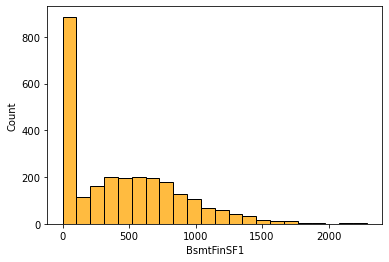

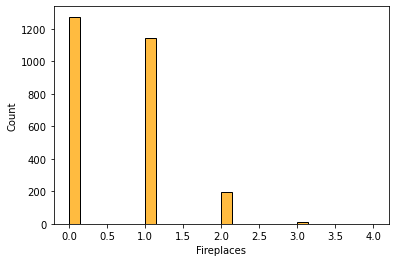

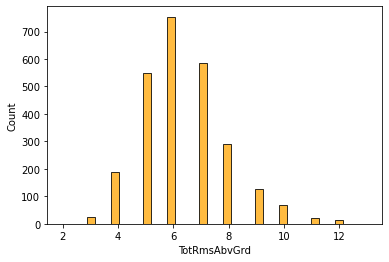

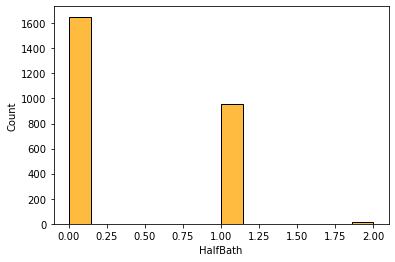

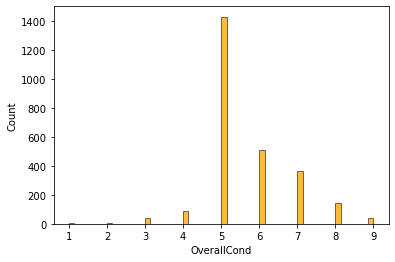

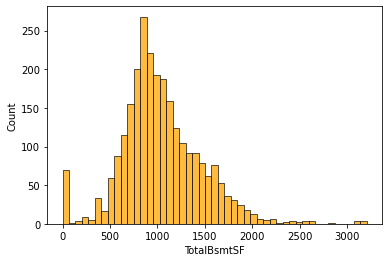

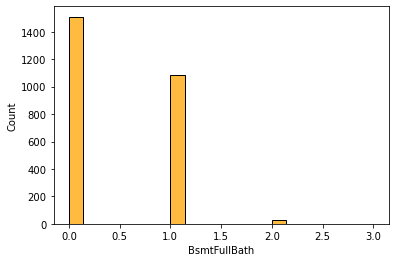

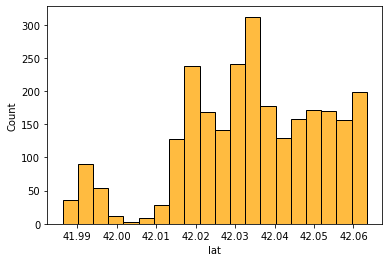

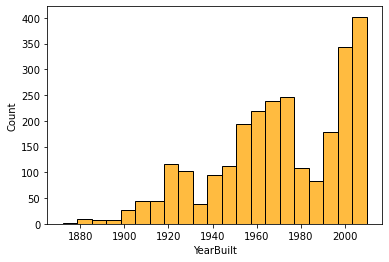

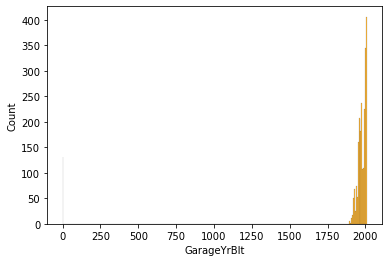

In [54]:
#Visualizing the skewed variables
skew_plt = list(high_skew.index)

for i in skew_plt:    
    fig, ax=plt.subplots()
    sns.histplot(df_housing[i], color='orange')

In [56]:
#Log transformation of skewed numerical features
np.seterr(divide = 'ignore') 

for col in high_skew.index:
    df_housing[col] = np.log1p(df_housing[col])

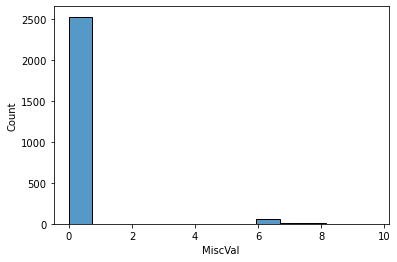

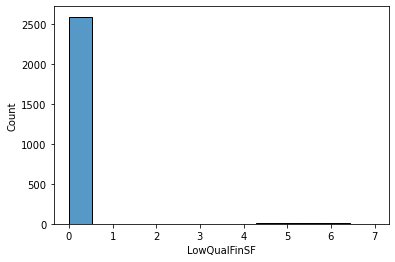

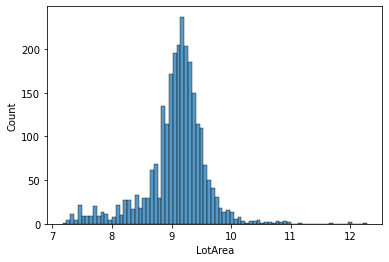

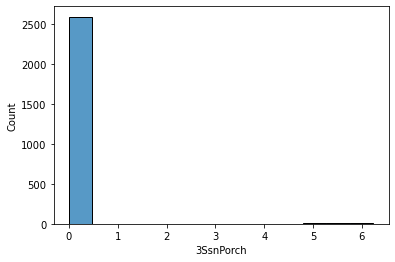

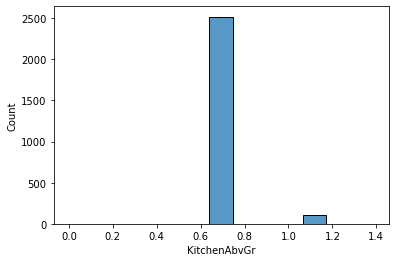

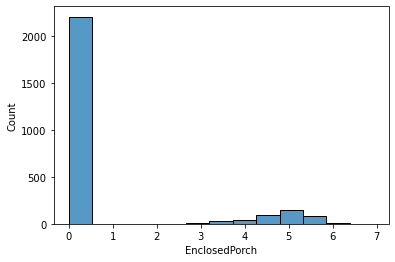

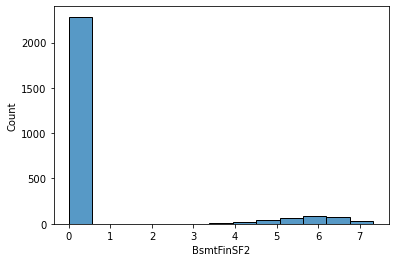

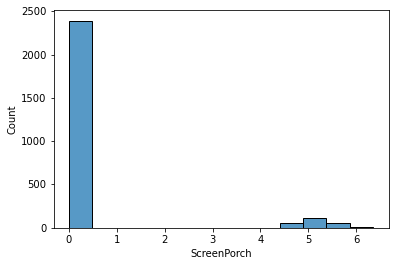

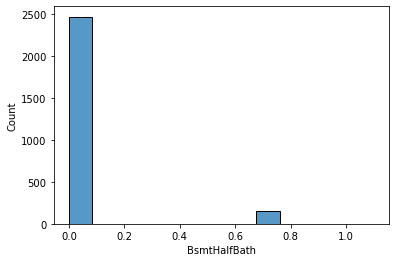

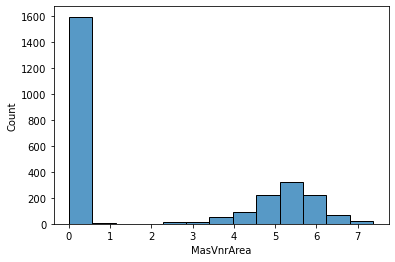

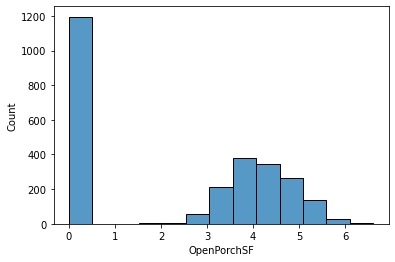

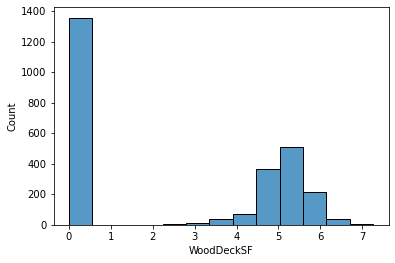

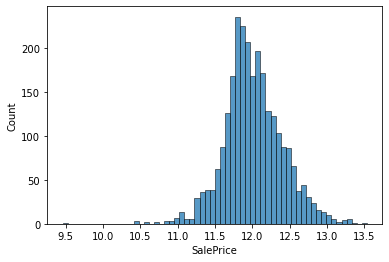

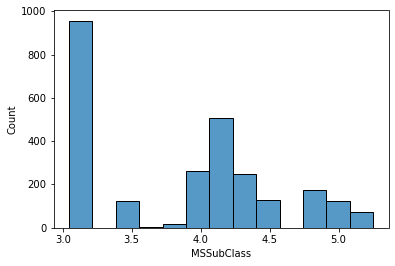

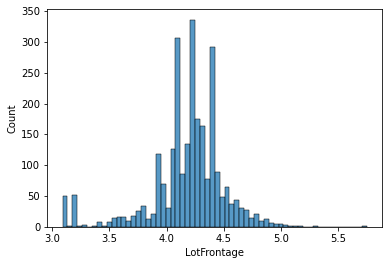

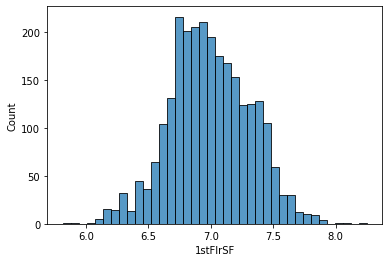

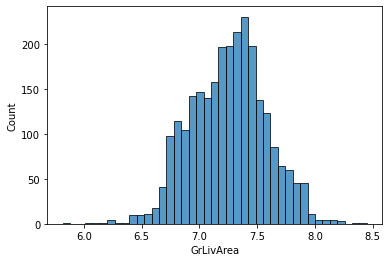

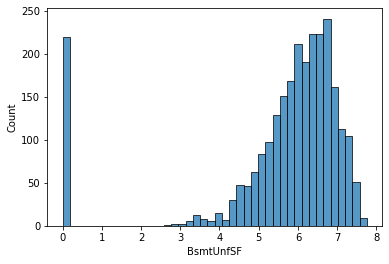

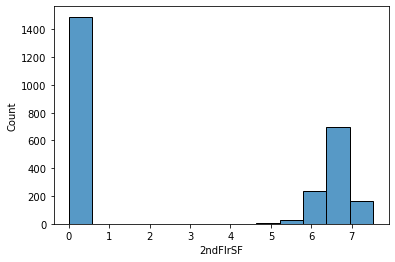

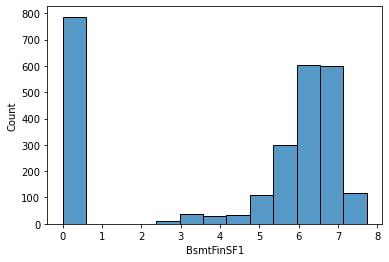

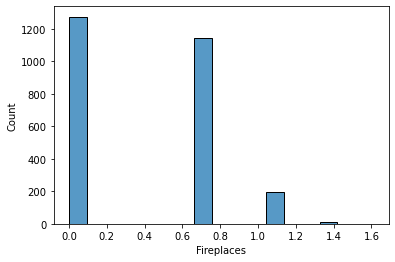

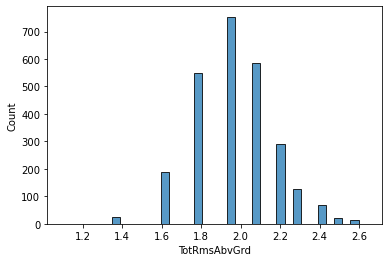

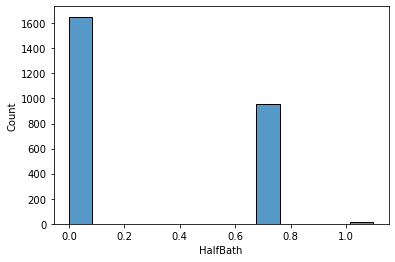

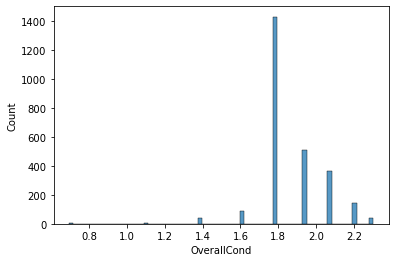

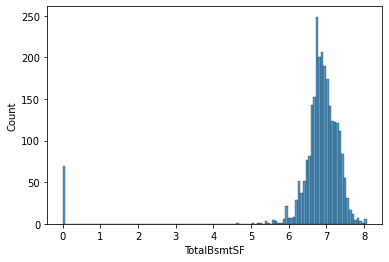

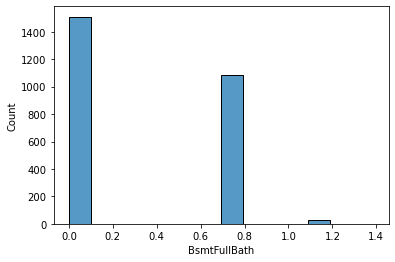

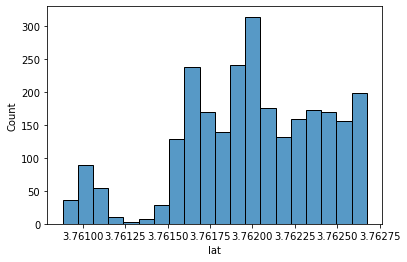

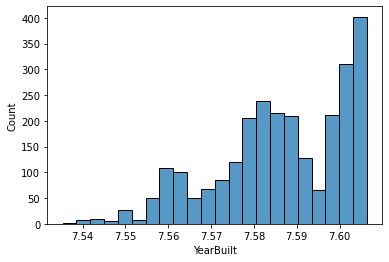

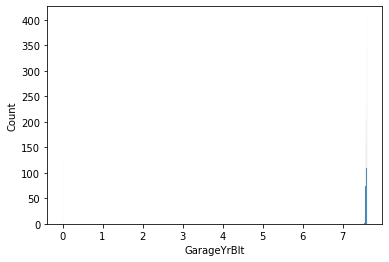

In [57]:
#Visualize the log transformation
skew_plt = list(high_skew.index)    

for i in skew_plt:    
    fig, ax=plt.subplots()
    sns.histplot(df_housing[i])

## Distribution of Dependent Variables (features)

#### Categorical

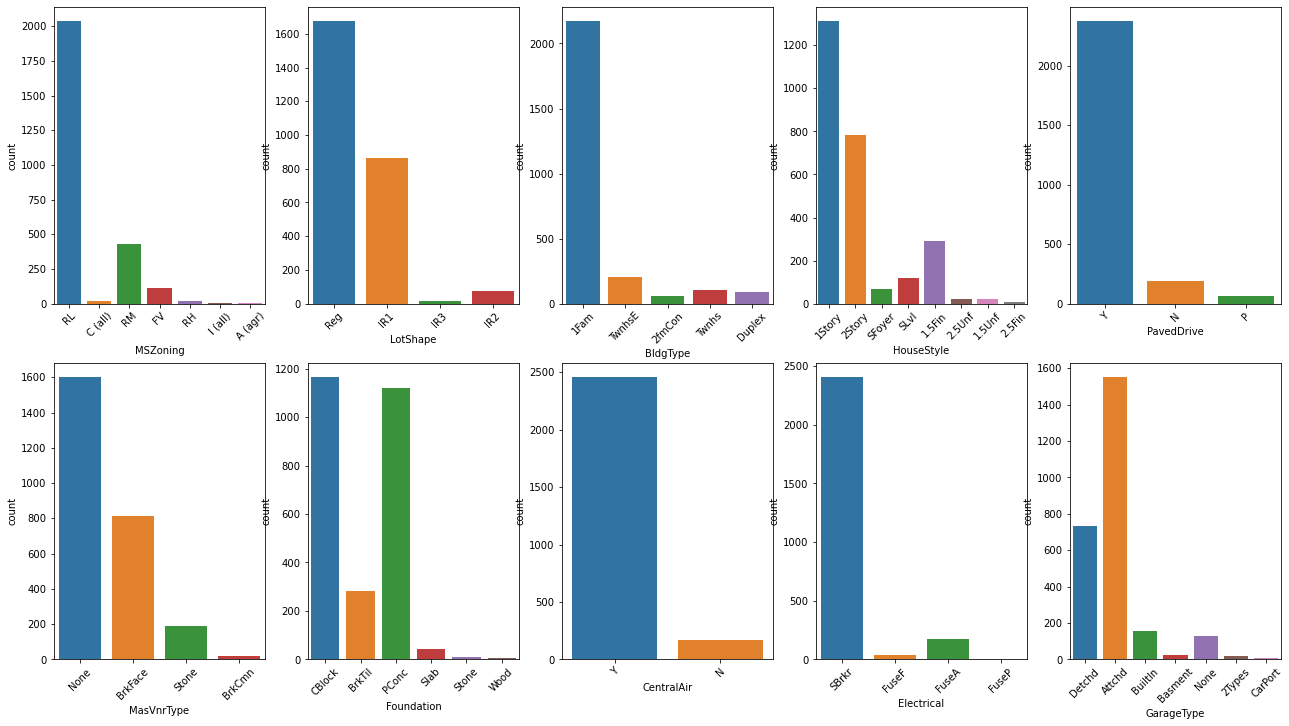

In [32]:
categorical = ['MSZoning', 'LotShape', 'BldgType','HouseStyle', 'PavedDrive',
                'MasVnrType','Foundation','CentralAir', 
                 'Electrical','GarageType', 'GarageFinish', 'Exterior1st']

#categorical variables and their histrograms
fig, ax = plt.subplots(2, 5, figsize=(22, 12))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(df_housing[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(45)

#### Ordinal

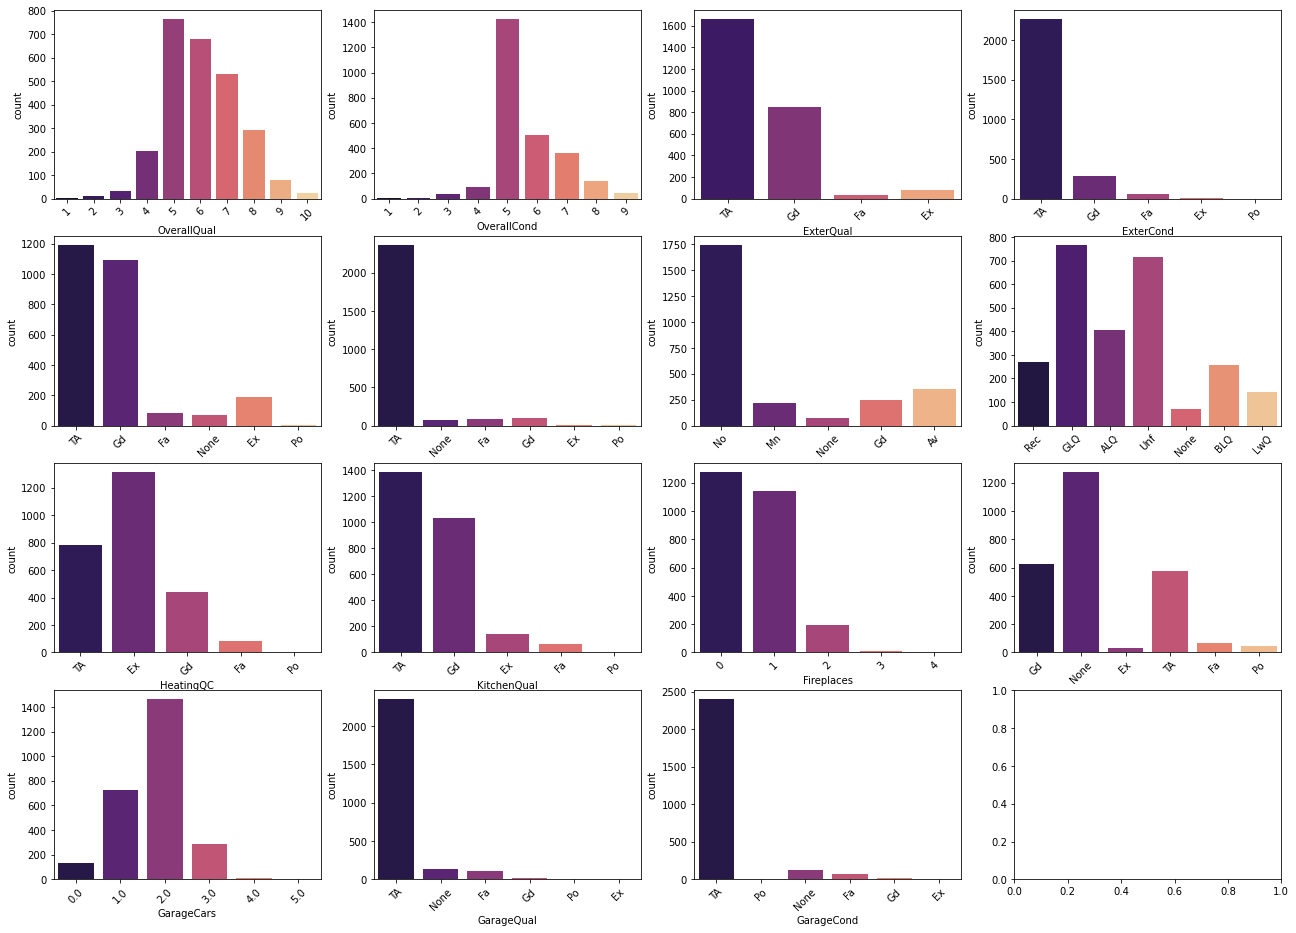

In [33]:
ordinal = ['OverallQual', 'OverallCond','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure',
                'BsmtFinType1','HeatingQC','KitchenQual','Fireplaces',
                'FireplaceQu','GarageCars', 'GarageQual', 'GarageCond']

#ordinal variables and their counts
fig, ax = plt.subplots(4, 4, figsize=(22, 16))
for variable, subplot in zip(ordinal, ax.flatten()):
    sns.countplot(df_housing[variable], ax=subplot, palette = 'magma')
    for label in subplot.get_xticklabels():
        label.set_rotation(45)

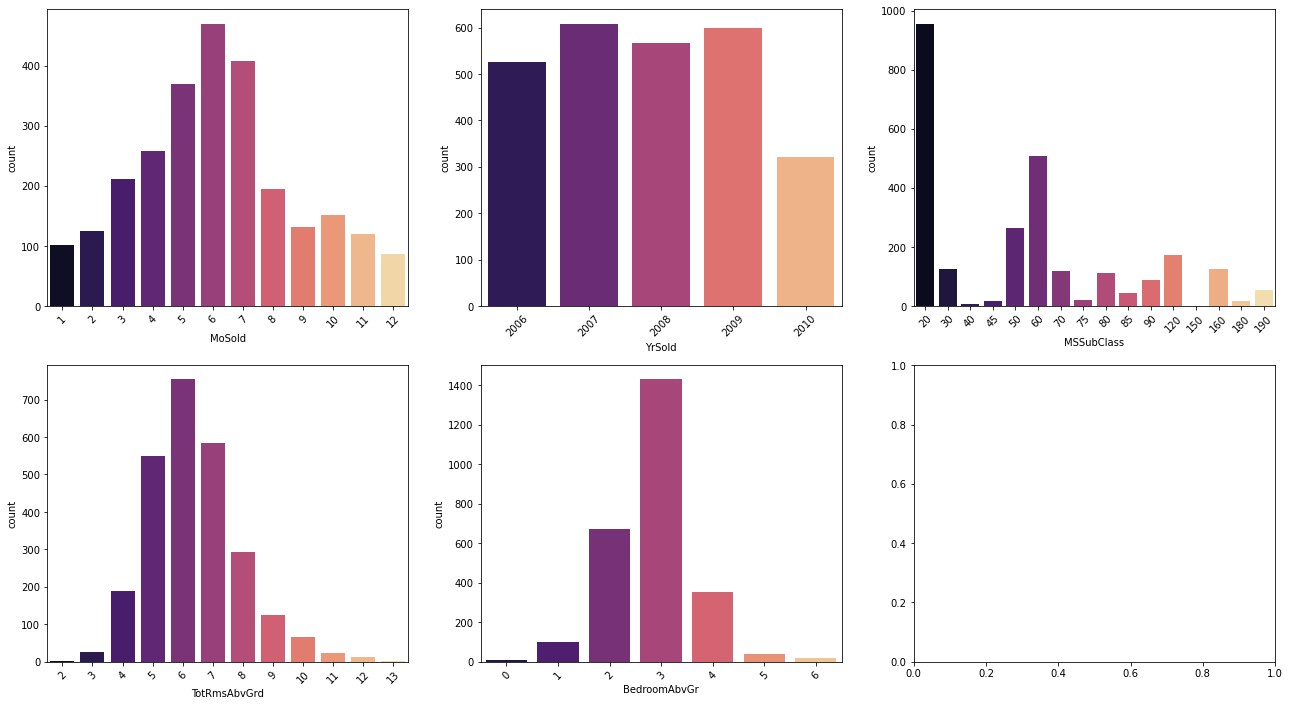

In [34]:
ordinal2 = ['MoSold', 'YrSold', 'MSSubClass', 'TotRmsAbvGrd','BedroomAbvGr']

#ordinal2 variables and their counts
fig, ax = plt.subplots(2, 3, figsize=(22, 12))
for variable, subplot in zip(ordinal2, ax.flatten()):
    sns.countplot(df_housing[variable], ax=subplot, palette = 'magma')
    for label in subplot.get_xticklabels():
        label.set_rotation(45)

### A time view

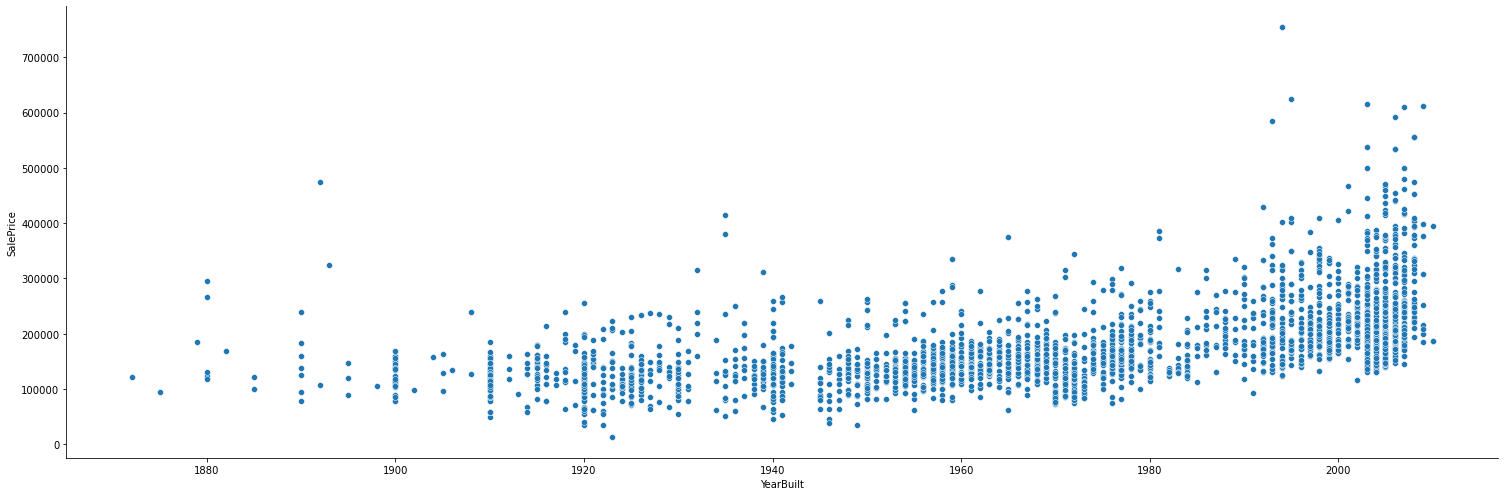

In [35]:
sns.relplot(data=df_housing, x='YearBuilt', y='SalePrice', kind='scatter',
            height=7, aspect=3, legend = 'full')

Text(0.5, 1.0, 'Sale Price of Different Quality Houses by Year')

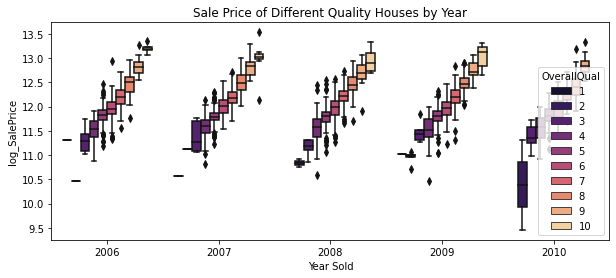

In [36]:
#Did houses of the same quality get priced differently throughout the years?
plt.figure(figsize=(10,4))
ax = sns.boxplot(x="YrSold", y="log_SalePrice", hue="OverallQual", data=df_housing, palette = "magma")
ax.set_xlabel('Year Sold')
ax.set_title('Sale Price of Different Quality Houses by Year')

### Neighborhood related view

<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

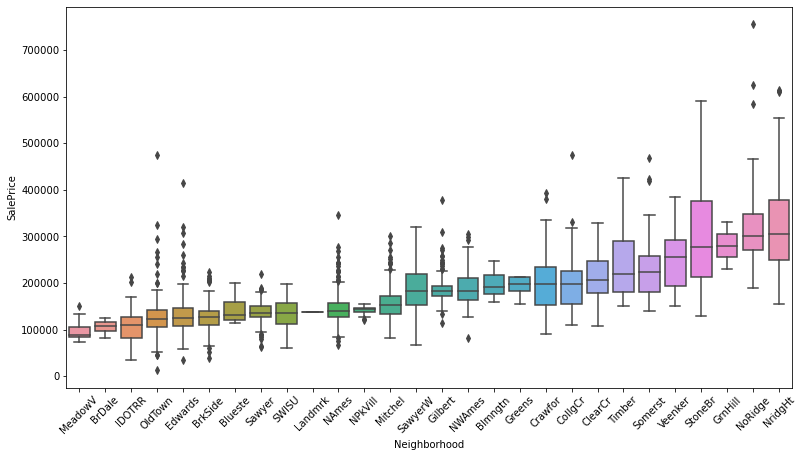

In [37]:
#neighborhoods
plt.figure(figsize=(13,7))
plt.xticks(rotation=45)
sorted_nb = df_housing.groupby(['Neighborhood'])['SalePrice'].median().sort_values()
sns.boxplot(x=df_housing['Neighborhood'], y=df_housing['SalePrice'], order=list(sorted_nb.index))

In [39]:
df_agg = df_housing.groupby(['Neighborhood']).agg({'PID': ['count']}).reset_index()
df_agg.columns = ['Neighborhood', 'count']
df_agg.sort_values('count', ascending = False).head(10)

,Neighborhood,count
15,NAmes,417
5,CollgCr,240
20,OldTown,217
7,Edwards,169
24,Somerst,145
8,Gilbert,145
22,Sawyer,141
17,NWAmes,124
19,NridgHt,123
23,SawyerW,114


### Price bins for home values

In [ ]:
#dropping columns 
#df_cars = df_cars.drop('name',axis=1)

In [43]:
#Creating Sale_Price Categories
bins = [0, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000]
SalePrice_labels = ['<$100k','100k','200k','300k','400k','500k','600k','700k']

df_housing['salebin'] = pd.cut(df_housing['SalePrice'], bins = bins, labels = SalePrice_labels)
df_housing['salebin']
df_housing['salebin'].unique()

['100k', '200k', '<$100k', '400k', '300k', '600k', '500k', '700k']
Categories (8, object): ['<$100k' < '100k' < '200k' < '300k' < '400k' < '500k' < '600k' < '700k']

In [45]:
#adding price per sq ft 

df_housing['price_per_sqft'] = round(df_housing['SalePrice']/(df_housing['1stFlrSF'] + df_housing['2ndFlrSF'] ), 2)

p_sqft = df_housing['price_per_sqft']
pmax, pmin = p_sqft.max(), p_sqft.min()
bin_size = (pmax - pmin)/8

price_sfqft_bins = list(range(int(pmin), int(pmax), int(bin_size)))
price_sfqft_bins = [5*round(price/5) for price in price_sfqft_bins]
price_sfqft_labels = ['$15 - 45', '80', '110', '145', '175', '205', '240', '270']

#price per sq ft bins 
df_housing['price_sqft_bin'] = pd.cut(df_housing['price_per_sqft'], bins = price_sfqft_bins, labels = price_sfqft_labels)

#print("$ per sqft max:", pmax)
#print("$ per sqft min:", pmin)
#bin_size 

<AxesSubplot:xlabel='OverallQual', ylabel='Count'>

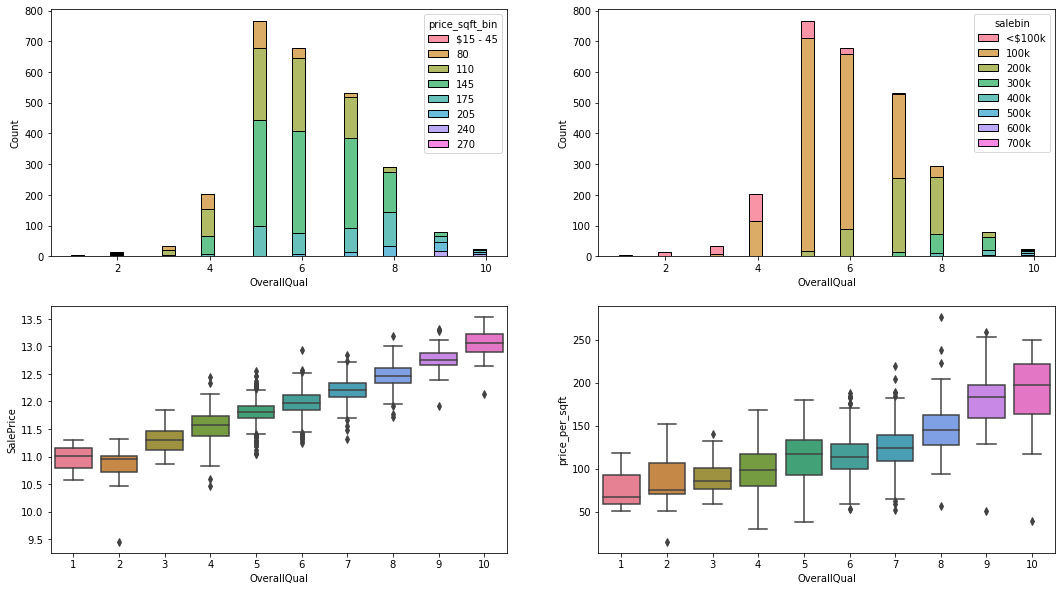

In [71]:
fig, ax = plt.subplots(2, 2, figsize = (18, 10))
sns.boxplot(x='OverallQual', y='SalePrice', data=df_housing,palette = "husl", ax = ax[1,0])
sns.boxplot(x='OverallQual', y='price_per_sqft', data=df_housing, palette = "husl",ax = ax[1,1])
sns.histplot(df_housing,x='OverallQual', stat='count', hue='salebin', multiple='stack', palette = "husl", ax = ax[0,1])
sns.histplot(df_housing,x='OverallQual', stat='count', hue='price_sqft_bin', palette = "husl", multiple='stack', ax = ax[0,0])

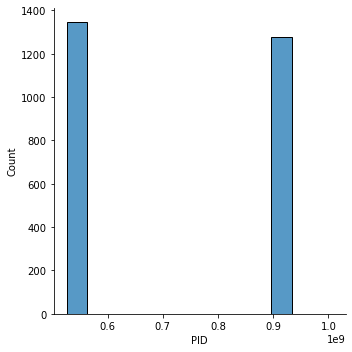

In [63]:
#Univariate Analysis- Univariate Analysis: “Uni” +“Variate”  Univariate, means one variable or feature analysis. The univariate analysis basically tells us how data in each feature is distributed. just sample as below.
sns_plot = sns.displot(df_housing["PID"])

In [ ]:
numerical_columns = ['GrLivArea', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 
                    'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
                    '2ndFlrSF', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
                    '3SsnPorch', 'ScreenPorch', 'PoolArea']

categorical_columns = ['MsSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
                      'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2','BldgType',
                      'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st',
                      'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
                      'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
                      'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
                      'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
                      'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond',
                      'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
                      'SaleCondition']